In [6]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier

In [9]:
#Loading Data:
pd.read_csv("Data_LDA.csv")
data = pd.read_csv("Data_LDA.csv")

In [4]:
#Checking Data:
data["prediction_trainig"] = data["prediction_trainig"].str.strip()
print(len(data[data["prediction_trainig"] == "training"]))
print(len(data[data["prediction_trainig"] == "prediction"]))

74997
25003


In [5]:
#Data Splitting:
Y= data.iloc[:,3]
X = data.iloc[:, 7:]

In [6]:
#Splitting Data into Training and Prediction Sets:
train_data = data[data["prediction_trainig"] == "training"]
pred_data = data[data["prediction_trainig"] == "prediction"]

In [7]:
# Model Preparation for Decision Tree
X_train_tree= train_data.iloc[:, 7:]
X_test_tree= pred_data.iloc[:, 7:]
y_train_tree= train_data.iloc[:, 3]
y_test_tree= pred_data.iloc[:, 3]

print(X_test_tree.shape)
print(X_train_tree.shape)
print(y_test_tree.shape)
print(y_train_tree.shape)

(25003, 4)
(74997, 4)
(25003,)
(74997,)


In [8]:
#Model Preparation for Random Forest:
X_train_forest= train_data.iloc[:, 7:]
X_test_forest = pred_data.iloc[:, 7:]
y_train_forest= train_data.iloc[:, 3]
y_test_forest= pred_data.iloc[:, 3]

print(X_test_forest.shape)
print(X_train_forest.shape)
print(y_test_forest.shape)
print(y_train_forest.shape)

(25003, 4)
(74997, 4)
(25003,)
(74997,)


In [9]:
#Model Preparation for Gradient Boosting:
X_train_gb= train_data.iloc[:, 7:]
X_test_gb= pred_data.iloc[:, 7:]
y_train_gb= train_data.iloc[:, 3]
y_test_gb= pred_data.iloc[:, 3]

print(X_test_gb.shape)
print(X_train_gb.shape)
print(y_test_gb.shape)
print(y_train_gb.shape)

(25003, 4)
(74997, 4)
(25003,)
(74997,)


In [10]:
# Model Preparation for KNeighborsClassifier 
X_train_KNN= train_data.iloc[:, 7:]
X_test_KNN= pred_data.iloc[:, 7:]
y_train_KNN= train_data.iloc[:, 3]
y_test_KNN= pred_data.iloc[:, 3]

print(X_test_KNN.shape)
print(X_train_KNN.shape)
print(y_test_KNN.shape)
print(y_train_KNN.shape)

(25003, 4)
(74997, 4)
(25003,)
(74997,)


In [11]:
#X_tree
mlr_X_train_tree= X_train_tree[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_tree = X_test_tree[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [12]:
#X_forest
mlr_X_train_forest= X_train_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_forest = X_test_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [13]:
#X_gb
mlr_X_train_gb= X_train_gb[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_gb= X_test_gb[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [14]:
#X_KN
mlr_X_train_KNN= X_train_KNN[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_KNN = X_test_KNN[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [15]:
seed = 40
# Define the decision tree model
tree_model = DecisionTreeClassifier(random_state=seed)

In [16]:
#Define the hyperparameter search space
param_grid = {
    #'criterion': ['gini', 'entropy'],
    'max_depth': [10],
    'min_samples_split': [7],
    'min_samples_leaf': [2]
}

In [17]:
# Perform hyperparameter search by cross-validation
grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(mlr_X_train_tree, y_train_tree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [7]},
             scoring='accuracy')

In [18]:
# Print the best hyperparameters 
best_params = grid_search_tree.best_params_
print("better hyperparameters :", best_params)

better hyperparameters : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [19]:
 # Print all hyperparameters, including internal hyperparameters
all_params = grid_search_tree.best_estimator_.get_params()
print("\nAll hyperparameters:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


All hyperparameters:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 10
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 7
min_weight_fraction_leaf: 0.0
random_state: 40
splitter: best


In [20]:
# ramdom forest models

In [21]:
#  X__forest 
mlr_X_train_forest= X_train_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_forest = X_test_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [22]:
# Define the random forest model
seed = 44
rf_model = RandomForestClassifier(random_state=seed)

In [23]:
#Define the hyperparameter search space
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [4],
    'min_samples_leaf': [2]
}

In [24]:
# Perform hyperparameter search by cross-validation
grid_search_forest = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# fit model
grid_search_forest.fit(mlr_X_train_forest, y_train_forest)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=44), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [4], 'n_estimators': [50]},
             scoring='accuracy')

In [25]:
# best hyperparameters
best_params = grid_search_forest.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}


In [26]:
# Print all hyperparameters, including internal hyperparameters
all_params = grid_search_forest.best_estimator_.get_params()
print("\nTodos los hiperparámetros:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


Todos los hiperparámetros:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 10
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 4
min_weight_fraction_leaf: 0.0
n_estimators: 50
n_jobs: None
oob_score: False
random_state: 44
verbose: 0
warm_start: False


In [27]:
seed = 42
# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=seed)

In [28]:
# X_gb
mlr_X_train_gb= X_train_gb[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_test_gb = X_test_gb[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [29]:
param_grid = {
    'n_estimators': [80],
    'learning_rate': [0.5],
    'max_depth': [4],
    'min_samples_split': [4],
    'min_samples_leaf': [6]
}

In [30]:
# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit model 
grid_search_gb.fit(mlr_X_train_gb, y_train_gb)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5], 'max_depth': [4],
                         'min_samples_leaf': [6], 'min_samples_split': [4],
                         'n_estimators': [80]},
             scoring='accuracy')

In [31]:
# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", best_params_gb)

Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.5, 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 80}


In [32]:
# Print all internal hyperparameters
internal_params = grid_search_gb.best_estimator_.get_params()
print("\nTodos los hiperparámetros internos:")
for param_name, param_value in internal_params.items():
    print(f"{param_name}: {param_value}")


Todos los hiperparámetros internos:
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.5
loss: log_loss
max_depth: 4
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 6
min_samples_split: 4
min_weight_fraction_leaf: 0.0
n_estimators: 80
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [33]:
# KNN models

In [34]:
# Define the hyperparameter search space
param_grid = {
   'n_neighbors': [20],  # Range of values for n_neighbors
    'p': [7]  # Range of values for the power parameter
}

In [35]:
# Create the KNeighborsClassifier model
KNN_model = KNeighborsClassifier()

In [36]:
# Create the GridSearchCV object
grid_search_KNN = GridSearchCV(KNN_model, param_grid, cv=5, scoring='accuracy')

In [37]:
# Perform hyperparameter search on the training data
grid_search_KNN.fit(mlr_X_train_KNN, y_train_KNN)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [20], 'p': [7]}, scoring='accuracy')

In [38]:
# Get the best hyperparameters
best_params_KNN = grid_search_KNN.best_params_
print("Best hyperparameters for KNeighborsClassifier:", best_params_KNN)

Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 20, 'p': 7}


In [39]:
# Print all hyperparameters, including internal hyperparameters
all_params_KNN = grid_search_KNN.best_estimator_.get_params()
print("\nAll hyperparameters for KNeighborsClassifier:")
for param_name, param_value in all_params_KNN.items():
    print(f"{param_name}: {param_value}")


All hyperparameters for KNeighborsClassifier:
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 20
p: 7
weights: uniform


In [40]:
# make predictions on the train set
y_pred_train_tree = grid_search_tree.predict(mlr_X_train_tree)
y_pred_train_forest = grid_search_forest.predict(mlr_X_train_forest)
y_pred_train_gb = grid_search_gb.predict(mlr_X_train_gb) 
y_pred_train_KNN = grid_search_KNN.predict(mlr_X_train_KNN) 

In [41]:
# calculate confusion matrices
cm_train_tree = confusion_matrix(y_train_tree, y_pred_train_tree)
cm_train_forest = confusion_matrix(y_train_forest, y_pred_train_forest)
cm_train_gb = confusion_matrix(y_train_gb, y_pred_train_gb)
cm_train_KNN = confusion_matrix(y_train_KNN, y_pred_train_KNN)

In [42]:
# calculate performance metrics
tn_train_tree, fp_train_tree, fn_train_tree, tp_train_tree = cm_train_tree.ravel()
tn_train_forest, fp_train_forest, fn_train_forest, tp_train_forest = cm_train_forest.ravel()
tn_train_gb, fp_train_gb, fn_train_gb, tp_train_gb = cm_train_gb.ravel()
tn_train_KNN, fp_train_KNN, fn_train_KNN, tp_train_KNN = cm_train_KNN.ravel()

In [43]:
specificity_train_tree = tn_train_tree / (tn_train_tree + fp_train_tree)
sensitivity_train_tree = tp_train_tree / (tp_train_tree + fn_train_tree)
accuracy_train_tree = (tp_train_tree + tn_train_tree) / (tp_train_tree + tn_train_tree + fp_train_tree + fn_train_tree)
false_positive_train_tree = fp_train_tree / (fp_train_tree + tn_train_tree)

In [44]:
specificity_train_forest = tn_train_forest / (tn_train_forest + fp_train_forest)
sensitivity_train_forest = tp_train_forest / (tp_train_forest + fn_train_forest)
accuracy_train_forest = (tp_train_forest + tn_train_forest) / (tp_train_forest + tn_train_forest + fp_train_forest + fn_train_forest)
false_positive_train_forest = fp_train_forest / (fp_train_forest + tn_train_forest)

In [45]:
specificity_train_gb = tn_train_gb / (tn_train_gb + fp_train_gb)
sensitivity_train_gb = tp_train_gb / (tp_train_gb + fn_train_gb)
accuracy_train_gb = (tp_train_gb + tn_train_gb) / (tp_train_gb + tn_train_gb + fp_train_gb + fn_train_gb)
false_positive_train_gb = fp_train_gb / (fp_train_gb + tn_train_gb)

In [46]:
specificity_train_KNN = tn_train_KNN / (tn_train_KNN + fp_train_KNN)
sensitivity_train_KNN = tp_train_KNN / (tp_train_KNN + fn_train_KNN)
accuracy_train_KNN = (tp_train_KNN + tn_train_KNN) / (tp_train_KNN + tn_train_KNN + fp_train_KNN + fn_train_KNN)
false_positive_train_KNN = fp_train_KNN / (fp_train_KNN + tn_train_KNN)

In [47]:
mcc_train_tree = matthews_corrcoef(y_train_tree, y_pred_train_tree)
mcc_train_forest = matthews_corrcoef(y_train_forest, y_pred_train_forest)
mcc_train_gb = matthews_corrcoef(y_train_gb, y_pred_train_gb)
mcc_train_KNN = matthews_corrcoef(y_train_KNN, y_pred_train_KNN)

In [48]:
# make predictions on the test set
y_pred_test_tree = grid_search_tree.predict(mlr_X_test_tree)
y_pred_test_forest = grid_search_forest.predict(mlr_X_test_forest)
y_pred_test_gb = grid_search_gb.predict(mlr_X_test_gb) 
y_pred_test_KNN = grid_search_KNN.predict(mlr_X_test_KNN) 

In [49]:
cm_pred_test_tree = confusion_matrix(y_test_tree, y_pred_test_tree)
cm_pred_test_forest = confusion_matrix(y_test_forest, y_pred_test_forest)
cm_pred_test_gb = confusion_matrix(y_test_gb, y_pred_test_gb)
cm_pred_test_KNN = confusion_matrix(y_test_KNN, y_pred_test_KNN)

In [50]:
# calculate performance metrics on test set
tn_test_tree, fp_test_tree, fn_test_tree, tp_test_tree = cm_pred_test_tree.ravel()
tn_test_forest, fp_test_forest, fn_test_forest, tp_test_forest = cm_pred_test_forest.ravel()
tn_test_gb, fp_test_gb, fn_test_gb, tp_test_gb = cm_pred_test_gb.ravel()
tn_test_KNN, fp_test_KNN, fn_test_KNN, tp_test_KNN = cm_pred_test_KNN.ravel()

In [51]:
specificity_test_tree = tn_test_tree / (tn_test_tree + fp_test_tree)
sensitivity_test_tree = tp_test_tree / (tp_test_tree + fn_test_tree)
accuracy_test_tree = (tp_test_tree + tn_test_tree) / (tp_test_tree + tn_test_tree + fp_test_tree + fn_test_tree)
false_positive_test_tree = fp_test_tree / (fp_test_tree + tn_test_tree)

In [52]:
specificity_test_forest = tn_test_forest / (tn_test_forest + fp_test_forest)
sensitivity_test_forest = tp_test_forest / (tp_test_forest + fn_test_forest)
accuracy_test_forest = (tp_test_forest + tn_test_forest) / (tp_test_forest + tn_test_forest + fp_test_forest + fn_test_forest)
false_positive_test_forest = fp_test_forest / (fp_test_forest + tn_test_forest)

In [106]:
specificity_test_gb = tn_test_gb / (tn_test_gb + fp_test_gb)
sensitivity_test_gb = tp_test_gb / (tp_test_gb + fn_test_gb)
accuracy_test_gb = (tp_test_gb + tn_test_gb) / (tp_test_gb + tn_test_gb + fp_test_gb + fn_test_gb)
false_positive_test_gb = fp_test_gb / (fp_test_gb + tn_test_gb)

In [107]:
specificity_test_KNN = tn_test_KNN / (tn_test_KNN + fp_test_KNN)
sensitivity_test_KNN = tp_test_KNN / (tp_test_KNN + fn_test_KNN)
accuracy_test_KNN = (tp_test_KNN + tn_test_KNN) / (tp_test_KNN + tn_test_KNN + fp_test_KNN + fn_test_KNN)
false_positive_test_KNN = fp_test_KNN / (fp_test_KNN + tn_test_KNN)

In [108]:
mcc_test_tree = matthews_corrcoef(y_test_tree, y_pred_test_tree)
mcc_test_forest = matthews_corrcoef(y_test_forest, y_pred_test_forest)
mcc_test_gb = matthews_corrcoef(y_test_gb, y_pred_test_gb)
mcc_test_KNN = matthews_corrcoef(y_test_KNN, y_pred_test_KNN)

In [109]:
# create a bar plot of the performance metrics for each classifier for the training and test sets
labels = ['Accuracy', 'Specificity', 'Sensitivity','1-False\nPositive\nRate','MCC']
tree_train_values = [accuracy_train_tree,specificity_train_tree,sensitivity_train_tree,1-false_positive_train_tree,mcc_train_tree]
forest_train_values = [accuracy_train_forest, specificity_train_forest, sensitivity_train_forest, 1-false_positive_train_forest, mcc_train_forest]
gb_train_values = [accuracy_train_gb, specificity_train_gb,sensitivity_train_gb, 1-false_positive_train_gb,mcc_train_gb]
KNN_train_values = [accuracy_train_KNN, specificity_train_KNN,sensitivity_train_KNN, 1-false_positive_train_KNN,mcc_train_KNN]

In [110]:
labels = ['Accuracy', 'Specificity', 'Sensitivity','1-False\nPositive\nRate','MCC']
tree_test_values = [accuracy_test_tree,specificity_test_tree,sensitivity_test_tree,1-false_positive_test_tree,mcc_test_tree]
forest_test_values = [accuracy_test_forest, specificity_test_forest, sensitivity_test_forest, 1-false_positive_test_forest, mcc_test_forest]
gb_test_values = [accuracy_test_gb, specificity_test_gb,sensitivity_test_gb, 1-false_positive_test_gb,mcc_test_gb]
KNN_test_values = [accuracy_test_KNN, specificity_test_KNN,sensitivity_test_KNN, 1-false_positive_test_KNN,mcc_test_KNN]

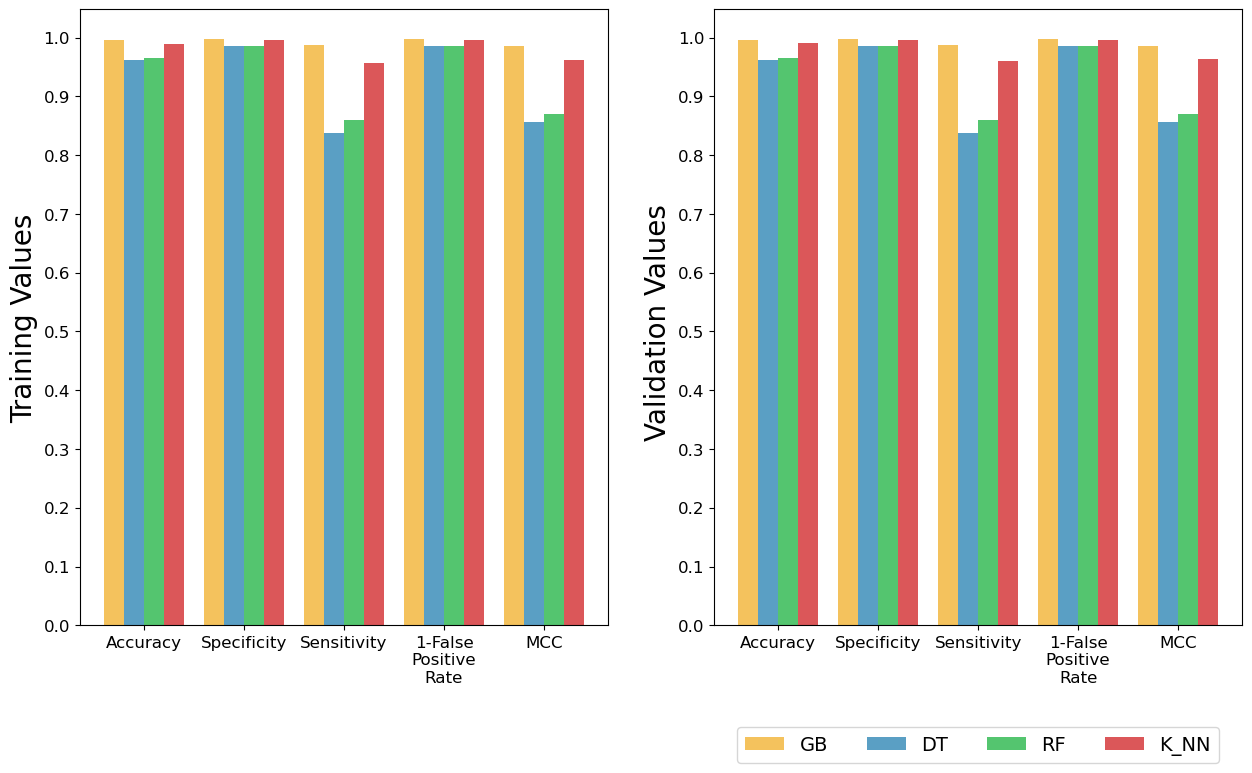

In [137]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(labels))  
width = 0.2 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Colors for the training set
colors_train = ['#1476AB', '#0BAD32', '#F0A818', '#CC1013']

# plot the performance metrics for the training set
rects1 = ax1.bar(x, tree_train_values, width, label='Decision Tree', color=colors_train[0], alpha=0.7)
rects2 = ax1.bar(x + width, forest_train_values, width, label='Random Forest', color=colors_train[1], alpha=0.7)
rects3 = ax1.bar(x - width, gb_train_values, width, label='Gradient_Bossting', color=colors_train[2], alpha=0.7)
rects4 = ax1.bar(x + 2*width, KNN_train_values, width, label='KNeighbors', color=colors_train[3], alpha=0.7)

ax1.set_ylabel('Training Values', fontsize=20)  
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(labels, fontsize=12)  
ax1.tick_params(axis='y', labelsize=12)  
ax1.set_yticks(np.arange(0, max(max(tree_train_values), max(forest_train_values), max(gb_train_values), max(KNN_train_values)) + 0.1, 0.1))

# Colors for the test set
colors_test = ['#1476AB', '#0BAD32', '#F0A818', '#CC1013']

# plot the performance metrics for the test set
rects1 = ax2.bar(x, tree_test_values, width, label='Decision Tree', color=colors_test[0], alpha=0.7)
rects2 = ax2.bar(x + width, forest_test_values, width, label='Random Forest', color=colors_test[1], alpha=0.7)
rects3 = ax2.bar(x - width, gb_test_values, width, label='Gradient_Bossting', color=colors_test[2], alpha=0.7)
rects4 = ax2.bar(x + 2*width, KNN_test_values, width, label='KNeighbors', color=colors_test[3], alpha=0.7)

ax2.set_ylabel('Validation Values ', fontsize=20)  
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(labels, fontsize=12) 
ax2.tick_params(axis='y', labelsize=12)  
ax2.set_yticks(np.arange(0, max(max(tree_test_values), max(forest_test_values), max(gb_test_values), max(KNN_test_values)) + 0.1, 0.1))

# Add legend outside the chart with custom order
plt.legend(handles=[rects3, rects1, rects2, rects4], labels=['GB', 'DT', 'RF', 'K_NN'],
            loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=14)

plt.savefig('Metric_plot.png', transparent=True)
plt.show()

In [112]:
#ROC training

In [113]:
from sklearn.metrics import roc_curve, auc

In [114]:
# Predict probabilities for training set
probas_train_tree = grid_search_tree.predict_proba(mlr_X_train_tree)[:, 1]
probas_train_forest = grid_search_forest.predict_proba(mlr_X_train_forest)[:, 1]
probas_train_gb = grid_search_gb.predict_proba(mlr_X_train_gb)[:, 1]
probas_train_KNN = grid_search_KNN.predict_proba(mlr_X_train_KNN)[:, 1]

In [115]:
# Compute ROC curve and AUC for decision tree model
fpr_train_tree, tpr_train_tree, thresholds_train_tree = roc_curve(y_train_tree, probas_train_tree )
roc_auc_train_tree = auc(fpr_train_tree, tpr_train_tree)

In [116]:
# Compute ROC curve and AUC for ramdom forest
fpr_train_forest, tpr_train_forest, thresholds_train_forest = roc_curve(y_train_forest, probas_train_forest )
roc_auc_train_forest = auc(fpr_train_forest, tpr_train_forest)

In [117]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_train_gb, tpr_train_gb, thresholds_train_gb= roc_curve(y_train_gb, probas_train_gb)
roc_auc_train_gb = auc(fpr_train_gb, tpr_train_gb)

In [118]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_train_KNN, tpr_train_KNN, thresholds_train_KNN= roc_curve(y_train_KNN, probas_train_KNN)
roc_auc_train_KNN = auc(fpr_train_KNN, tpr_train_KNN)

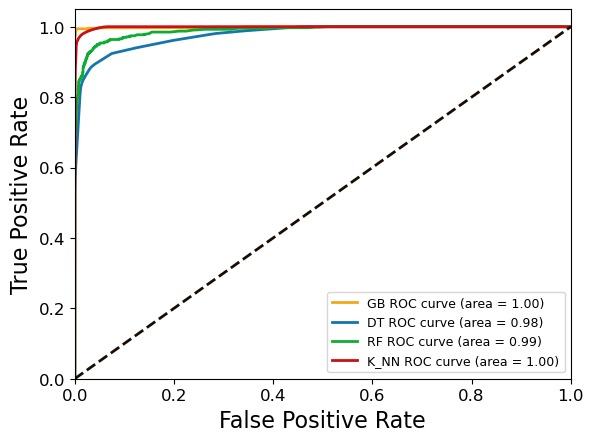

In [148]:
# Plot ROC curves
plt.plot(fpr_train_gb, tpr_train_gb, color='#F0A818', lw=2,label='GB ROC curve (area = %0.2f)' % roc_auc_train_gb)
plt.plot(fpr_train_tree, tpr_train_tree, color='#1476AB', lw=2, label='DT ROC curve (area = %0.2f)' % roc_auc_train_tree)
plt.plot(fpr_train_forest, tpr_train_forest, color='#0BAD32', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_train_forest)
plt.plot(fpr_train_KNN, tpr_train_KNN, color='#CC1013', lw=2, label='K_NN ROC curve (area = %0.2f)' % roc_auc_train_KNN)  # Added KNeighbors ROC
plt.plot([0, 1], [0, 1], color='#170D03', lw=2, linestyle='--')

# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#plt.title('Receiver Operating Characteristic (ROC) - Training Set', fontsize=14)
plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_train_2.png', dpi=600, transparent=True)
plt.show()

In [67]:
# Curva ROC prediction 

In [68]:
probas_test_tree = grid_search_tree.predict_proba(mlr_X_test_tree)[:, 1]
probas_test_forest = grid_search_forest.predict_proba(mlr_X_test_forest)[:, 1]
probas_test_gb = grid_search_gb.predict_proba(mlr_X_test_gb)[:, 1]
probas_test_KNN = grid_search_KNN.predict_proba(mlr_X_test_KNN)[:, 1]

In [69]:
# Compute ROC curve and AUC for decision tree model
fpr_test_tree, tpr_test_tree, thresholds_test_tree = roc_curve(y_test_tree, probas_test_tree)
roc_auc_test_tree = auc(fpr_test_tree, tpr_test_tree)

In [70]:
# Compute ROC curve and AUC for ramdom forest
fpr_test_forest, tpr_test_forest, thresholds_test_forest = roc_curve(y_test_forest, probas_test_forest )
roc_auc_test_forest = auc(fpr_test_forest, tpr_test_forest)

In [71]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_test_gb, tpr_test_gb, thresholds_test_gb= roc_curve(y_test_gb, probas_test_gb)
roc_auc_test_gb = auc(fpr_test_gb, tpr_test_gb)

In [72]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_test_KNN, tpr_test_KNN, thresholds_test_KNN= roc_curve(y_test_KNN, probas_test_KNN)
roc_auc_test_KNN = auc(fpr_test_KNN, tpr_test_KNN)

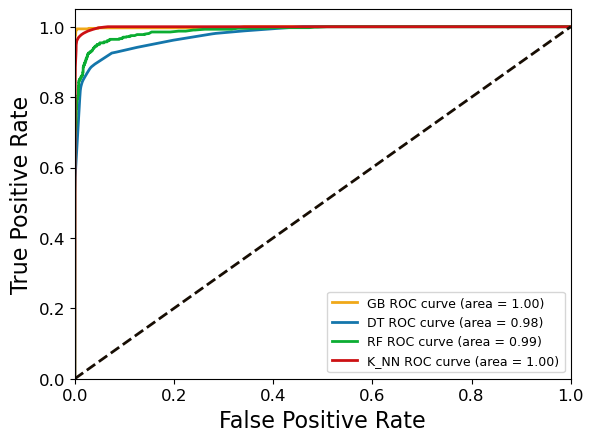

In [150]:
# Plot ROC curves
plt.plot(fpr_test_gb, tpr_test_gb, color='#F0A818', lw=2,label='GB ROC curve (area = %0.2f)' % roc_auc_test_gb)
plt.plot(fpr_test_tree, tpr_test_tree, color='#1476AB', lw=2, label='DT ROC curve (area = %0.2f)' % roc_auc_test_tree)
plt.plot(fpr_test_forest, tpr_test_forest, color='#0BAD32', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_test_forest)
plt.plot(fpr_test_KNN, tpr_test_KNN, color='#CC1013', lw=2, label='K_NN ROC curve (area = %0.2f)' % roc_auc_test_KNN)  # Added KNeighbors ROC
plt.plot([0, 1], [0, 1], color='#170D03', lw=2, linestyle='--')

# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.title('Receiver Operating Characteristic (ROC) - Training Set', fontsize=14)
plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_pred_2.png', dpi=600, transparent=True)
plt.show()